In [1]:
T= True
F = False

import sys
import numpy as np
from typing import Optional, Tuple, List
import warnings
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

from pyFitting import (
    # Main
    Fitter,
    ArrayData,
    
    # Models
    GaussianModel,
    ExponentialModel,
    LinearModel,
    PowerLawModel,
    PolynomialModel,
    BaseModel,
    
    # Loss functions
    MSELoss,
    Chi2Loss,
    CorrelationLoss,
    HybridLoss,
    OverlapLoss,
    
    # Optimizers
    LocalOptimizer,
    compare_optimizers,
    
    # Evaluation
    StandardEvaluator,
    
    # Utils
    get_ab_correlation,
    get_similarity_by_overlap,

    plot_fit,
    plot_residuals,
    plot_fit_with_residuals,
    plot_parameter_corners,
    plot_diagnostics,
    plot_comparison,
    plot1D,
    colors_, markers_, lstyles_,
    create_fig_ax, create_2ax_main_minor,


)


In [3]:
# Generate sample data
x = np.linspace(0, 10, 100)
y = 2.5 * np.exp(-0.5 * ((x - 5) / 1.2)**2) + 0.3
y += np.random.normal(0, 0.05, len(x))  # Add noise

# Create data container
data = ArrayData(x, y)

# Create model and fit
model = GaussianModel()
fitter = Fitter(data, model)
result = fitter.fit()

# Check results
print(f"Fit successful: {result.success}")
print(f"R² = {result.metrics['r2']:.4f}")
print(f"Parameters: {result.parameters.values}")

Fit successful: True
R² = 0.9969
Parameters: {'A': 2.530624313128511, 'mu': 5.003624413923587, 'sigma': 1.208038591131673, 'c': 0.2836942009039617}


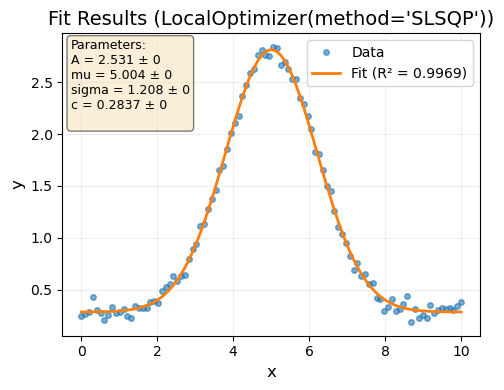

In [4]:
fig, ax = plot_fit(result, logx=F, logy=F, figsize=[5,4] , save='../images/quickstart_fit.png')

In [5]:
from pyFitting import ArrayData
# Basic usage
data0 = ArrayData(x, y)

# Basic usage
data = ArrayData(x, y)

# With weights
weights = np.ones_like(x)
weights[50:60] = 5.0  # More weight in this region
data_weighted = ArrayData(x, y, weights=weights)

# With error bars
y_errors = np.ones_like(y) * 0.1
data_with_errors = ArrayData(x, y, y_errors=y_errors)

print(f"Data contains {len(data)} points")

# Focus on a specific x-range
data.apply_range_mask(x_min=2.0, x_max=8.0)
print(f"Points in range: {len(data)}")

# y_median = np.median(y)
# y_std = np.std(y)
# outlier_mask = np.abs(y - y_median) < 3 * y_std

#data.set_mask(outlier_mask)
print(f"Points after filtering: {len(data)}")





Data contains 100 points
Points in range: 60
Points after filtering: 60


In [6]:
#data_weighted.get_weights()

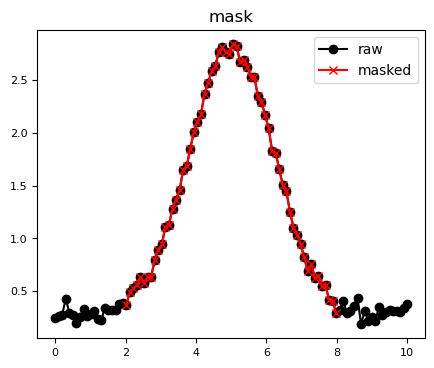

In [7]:
fig = plt.figure( figsize=[5,4])
ax = fig.add_subplot(111)
plot1D( x = data0.get_x(), y = data0.get_y()  ,   ax=ax, c='k', m='o', legend='raw' )
plot1D( x = data.get_x(), y = data.get_y(), ax=ax, c='r', m='x',   legend='masked' )
#plot1D( x = data_weighted .get_x(), y = data_weighted .get_y(), ax=ax, c='b', m='o',  )
ax.set_title('mask')
fig.savefig(  '../images/masking_example.png')


In [8]:
x = np.linspace(0.1, 5, 100)
y = 10 * np.exp(-2 * x) + 0.5

data_linear = ArrayData(x, y)
data_log = data_linear.transform('log')        # Log y-axis
data_loglog = data_linear.transform('log_log')  # Log both axes

print(f"Original space: {data_linear.space}")
print(f"Log space: {data_log.space}")

Original space: linear
Log space: log


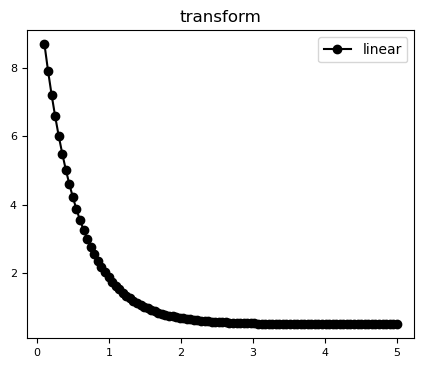

In [9]:
fig = plt.figure( figsize=[5,4])
ax = fig.add_subplot(111)
plot1D( x = data_linear.get_x(), y = data_linear.get_y()  ,   ax=ax, c='k', m='o', legend='linear' )
#plot1D( x = data.get_x(), y = data.get_y(), ax=ax, c='r', m='x',   legend='masked' )
#plot1D( x = data_weighted .get_x(), y = data_weighted .get_y(), ax=ax, c='b', m='o',  )
ax.set_title('transform')
fig.savefig(  '../images/transform_example.png')

In [10]:
weights = np.ones_like(x)
peak_region = (x > 4) & (x < 6)
weights[peak_region] = 5.0  # 5x more weight near peak

data_weighted = ArrayData(x, y, weights=weights)
result = Fitter(data_weighted, GaussianModel()).fit()
print(f"Peak position: {result.parameters.values['mu']:.3f}")

Peak position: -10.897


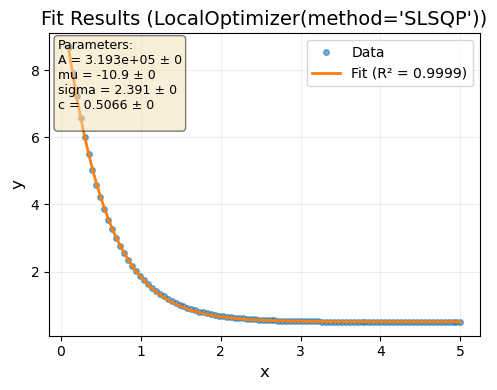

In [11]:
fig, ax = plot_fit(result, logx=F, logy=F, figsize=[5,4] , save='../images/weighted_fit.png')

In [12]:
from pyFitting import Fitter, ArrayData, GaussianModel, HybridLoss, LocalOptimizer

# Prepare data
data = ArrayData(x, y)

# Configure model
model = GaussianModel()
model.fix_parameter('c', value=0.3)  # Fix offset

# Set initial guess
initial = {'A': 2.0, 'mu': 5.0, 'sigma': 1.0}

# Set bounds
bounds = {
    'A': (0.1, 10.0),
    'mu': (0.0, 10.0),
    'sigma': (0.1, 3.0)
}

# Configure optimizer and loss
optimizer = LocalOptimizer('SLSQP')
loss = HybridLoss(alpha=0.8, use_log=True)

# Fit with all features
fitter = Fitter(data, model, loss=loss, optimizer=optimizer)
result = fitter.fit(initial_guess=initial, bounds=bounds, verbose=True)

print(f"Success: {result.success}")
print(f"R² = {result.metrics['r2']:.4f}")


Fitting with LocalOptimizer(method='SLSQP')
Model: GaussianModel(1 params)
Loss: HybridLoss(alpha=0.8, space='log')
Data: 100 points in 'linear' space

Free parameters: ['A', 'mu', 'sigma']
Bounds: {'A': (0.1, 10.0), 'mu': (0.0, 10.0), 'sigma': (0.1, 3.0)}

Optimizing...

✓ SUCCESS: Optimization terminated successfully
Function evaluations: 26
Final loss: 6.041623e-01

Fit quality:
  R² = -0.3836
  R² (log) = -1.7957
  χ²_red = 0.8890

Success: True
R² = -0.3836


/opt/anaconda3/envs/pyScattering/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/opt/anaconda3/envs/pyScattering/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)


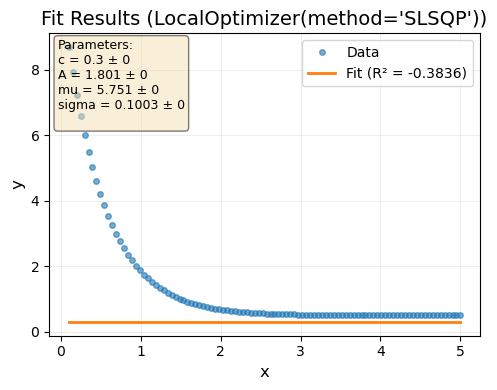

In [13]:
fig, ax = plot_fit(result, logx=F, logy=F, figsize=[5,4] ) #, save='../images/weighted_fit.png')

In [14]:
# Generate exponential data
x_exp = np.linspace(0.1, 5, 100)
y_exp = 10 * np.exp(-2 * x_exp) + 0.5 + np.random.normal(0, 0.1, len(x_exp))

data_linear = ArrayData(x_exp, y_exp)
data_log = data_linear.transform('log')
data_loglog = data_linear.transform('log_log')

print(f"Linear space: {data_linear.space}")
print(f"Log space: {data_log.space}")
print(f"Log-log space: {data_loglog.space}")

Linear space: linear
Log space: log
Log-log space: log_log


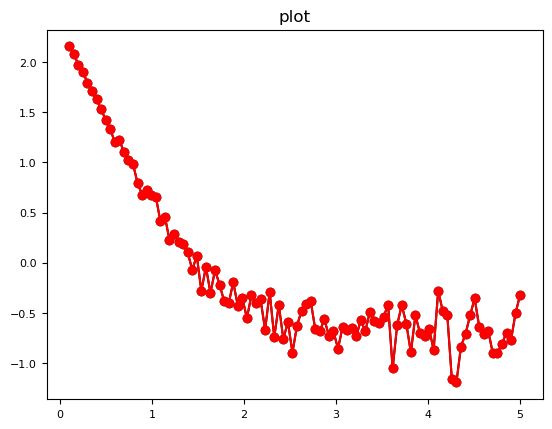

In [15]:
fig, ax = plt.subplots()
plot1D( x = data_linear.get_x(), y = np.log( data_linear.get_y() ),   ax=ax, c='k', m='o',  )
plot1D( x = data_log.get_x(), y = data_log.get_y(), ax=ax, c='r', m='o',  )




In [16]:
import numpy as np
from pyFitting import Fitter, ArrayData, GaussianModel, plot_fit_with_residuals

# Simulate spectroscopy data
wavelength = np.linspace(500, 600, 200)
intensity = 100 * np.exp(-0.5 * ((wavelength - 550) / 8)**2) + 10
intensity += np.random.normal(0, 2, len(wavelength))

# Create data
data = ArrayData(wavelength, intensity)

# Fit Gaussian
model = GaussianModel()
fitter = Fitter(data, model)
result = fitter.fit()

# Results
print(f"Peak wavelength: {result.parameters.values['mu']:.2f} nm")
print(f"Peak intensity: {result.parameters.values['A']:.2f}")
print(f"FWHM: {2.355 * result.parameters.values['sigma']:.2f} nm")
print(f"R²: {result.metrics['r2']:.4f}")

Peak wavelength: 549.99 nm
Peak intensity: 99.79
FWHM: 18.95 nm
R²: 0.9959


(<Figure size 800x600 with 3 Axes>,
 [<Axes: ylabel='Intensity'>,
  <Axes: xlabel='Wavelength (nm)', ylabel='Residuals (%)'>,
  <Axes: >])

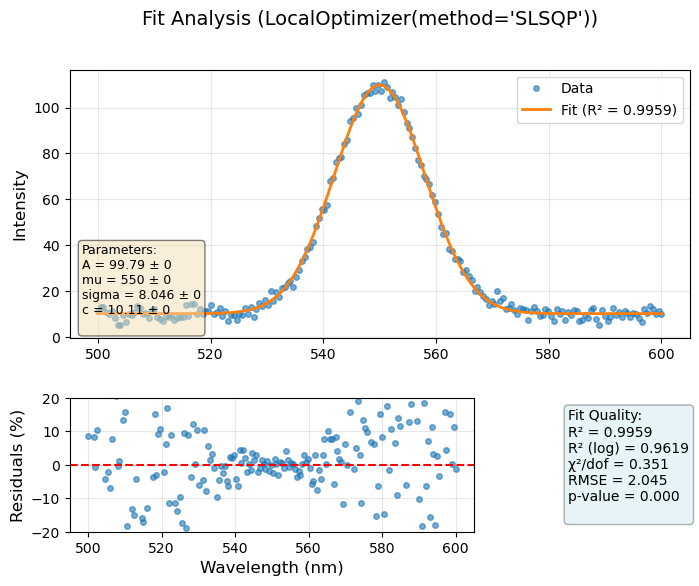

In [17]:
plot_fit_with_residuals(result, xlabel='Wavelength (nm)', ylabel='Intensity', figsize=[8,6],save='../images/example_peak_analysis.png')

In [18]:
from pyFitting import ExponentialModel, HybridLoss

# Generate decay data
time = np.linspace(0, 10, 100)
signal = 100 * np.exp(-0.5 * time) + 5
signal += np.random.normal(0, 2, len(signal))

# Fit with log-space loss
data = ArrayData(time, signal)
model = ExponentialModel()
loss = HybridLoss(alpha=0.8, use_log=True)  # Better for exponentials

result = Fitter(data, model, loss=loss).fit()

# Calculate half-life
half_life = np.log(2) / result.parameters.values['k']
print(f"Decay rate: {result.parameters.values['k']:.4f} s⁻¹")
print(f"Half-life: {half_life:.2f} s")
print(f"Baseline: {result.parameters.values['c']:.2f}")

Decay rate: 0.4632 s⁻¹
Half-life: 1.50 s
Baseline: 3.76


In [19]:
result.parameters.values

{'A': 102.09995359078057, 'k': 0.46320940234080665, 'c': 3.760831562901763}

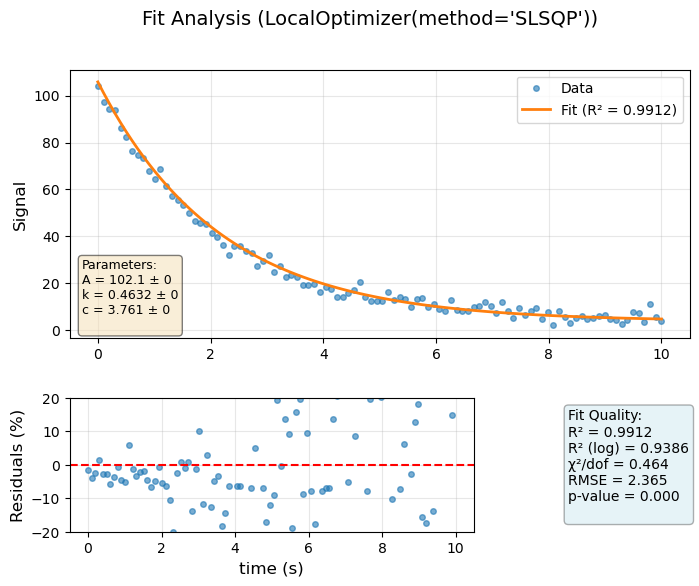

In [20]:
fig, axes = plot_fit_with_residuals(result, xlabel='time (s)', ylabel='Signal', figsize=[8,6],save='../images/example_decay.png')

In [21]:
#%run -i ~/Repos/pyFitting/pyFitting/models/Initial_Guess_Strategy_Best_Practices_Guide.py

In [22]:
class DoubleGaussianModel(BaseModel):
    def evaluate(self, x, A1, mu1, sigma1, A2, mu2, sigma2, c):
        peak1 = A1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2)
        peak2 = A2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
        return peak1 + peak2 + c
    
    def get_initial_guess(self):
        return {
                'A1': 1.0, 'mu1': 4.0, 'sigma1': 0.5,
                'A2': 1.0, 'mu2': 6.0, 'sigma2': 0.5,
                'c': 0.0
            }
 

In [23]:
# Generate two overlapping peaks
x = np.linspace(0, 10, 200)
y = (2.0 * np.exp(-0.5 * ((x - 4.0) / 0.6)**2) +
     1.5 * np.exp(-0.5 * ((x - 6.5) / 0.8)**2) + 0.2)
y += np.random.normal(0, 0.05, len(x))

# Fit
data = ArrayData(x, y)
model = DoubleGaussianModel()

# Provide good initial guess
initial = {
    'A1': 2.0, 'mu1': 4.0, 'sigma1': 0.6,
    'A2': 1.5, 'mu2': 6.5, 'sigma2': 0.8,
    'c': 0.2
}

result = Fitter(data, model).fit(initial_guess=initial)

print("Peak 1:")
print(f"  Position: {result.parameters.values['mu1']:.2f}")
print(f"  Amplitude: {result.parameters.values['A1']:.2f}")
print("Peak 2:")
print(f"  Position: {result.parameters.values['mu2']:.2f}")
print(f"  Amplitude: {result.parameters.values['A2']:.2f}")

Peak 1:
  Position: 3.99
  Amplitude: 2.03
Peak 2:
  Position: 6.50
  Amplitude: 1.51


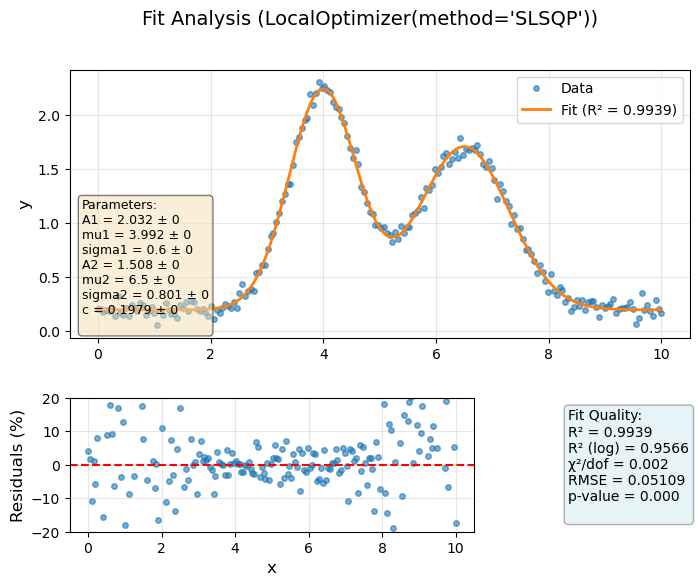

In [24]:
fig, axes = plot_fit_with_residuals(result, xlabel='x', ylabel='y', figsize=[8,6],save='../images/example_double_peaks.png')

In [25]:
from pyFitting import PowerLawModel

# Generate power law data
x = np.logspace(0, 2, 50)  # 1 to 100
y = 50 * x**(-1.5) + np.random.normal(0, 0.5, len(x))

# Transform to log-log space
#data = ArrayData(x, y).transform('log_log')
data = ArrayData(x, y)


# Fit power law
model = PowerLawModel()
result = Fitter(data, model).fit()

print(f"Scaling: y = {result.parameters.values['c3']:.2f} * x^(-{result.parameters.values['n']:.2f})")
print(f"R² (log-log): {result.metrics['r2_log']:.4f}")

Scaling: y = 50.31 * x^(-1.52)
R² (log-log): 0.8785


In [26]:
result.parameters.values

{'c3': 50.30792843561032, 'n': 1.5193626251035337}

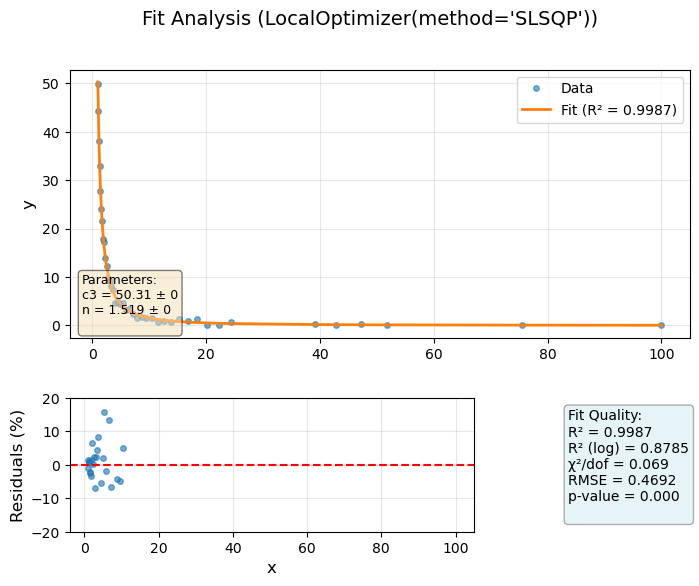

In [27]:
fig, axes = plot_fit_with_residuals(result, xlabel='x', ylabel='y', figsize=[8,6],save='../images/example_powerlaw.png')

In [28]:
from pyFitting import PowerLawModel

# Generate power law data
x = np.logspace(0, 2, 50)  # 1 to 100
y = 50 * x**(-1.5) + np.random.normal(0, 0.5, len(x))

# Transform to log-log space
data = ArrayData(x, y).transform('log_log')
#data = ArrayData(x, y).transform('log')
#data = ArrayData(x, y)


# Fit power law
model = LinearModel()
result = Fitter(data, model).fit()

#print(f"Scaling: y = {result.parameters.values['c3']:.2f} * x^(-{result.parameters.values['n']:.2f})")
print( result.parameters.values )
print(f"R² (log-log): {result.metrics['r2_log']:.4f}")

{'a': -1.2822729444933487, 'b': 3.6714015051050977}
R² (log-log): 0.5931


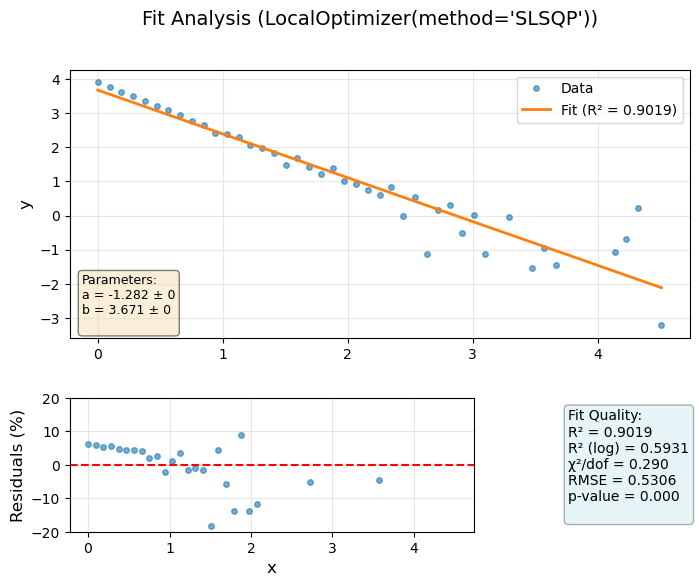

In [29]:
fig, axes = plot_fit_with_residuals(result, xlabel='x', ylabel='y', figsize=[8,6],save='../images/x.png')

In [30]:
%run -i ~/Repos/pyFitting/pyFitting/visualization/plotters.py

<Figure size 640x480 with 0 Axes>

In [31]:
#plot_data( data  )

In [32]:
x = np.linspace(0, 10, 200)
y = 5 * np.exp(-0.5 * ((x - 5) / 0.5)**2) + 1.0
y += np.random.normal(0, 0.1, len(x))

# Create weights: emphasize peak region
weights = np.ones_like(x)
peak_mask = (x > 4) & (x < 6)
weights[peak_mask] = 10.0  # 10x more weight in peak

data_weighted = ArrayData(x, y, weights=weights)
data_unweighted = ArrayData(x, y)

# Fit both
result_weighted = Fitter(data_weighted, GaussianModel()).fit()
result_unweighted = Fitter(data_unweighted, GaussianModel()).fit()

print("Unweighted fit:")
print(f"  Peak position: {result_unweighted.parameters.values['mu']:.3f}")
print(f"  R²: {result_unweighted.metrics['r2']:.4f}")

print("\nWeighted fit (peak emphasized):")
print(f"  Peak position: {result_weighted.parameters.values['mu']:.3f}")
print(f"  R²: {result_weighted.metrics['r2']:.4f}")


Unweighted fit:
  Peak position: 4.999
  R²: 0.9950

Weighted fit (peak emphasized):
  Peak position: 4.999
  R²: 0.9950


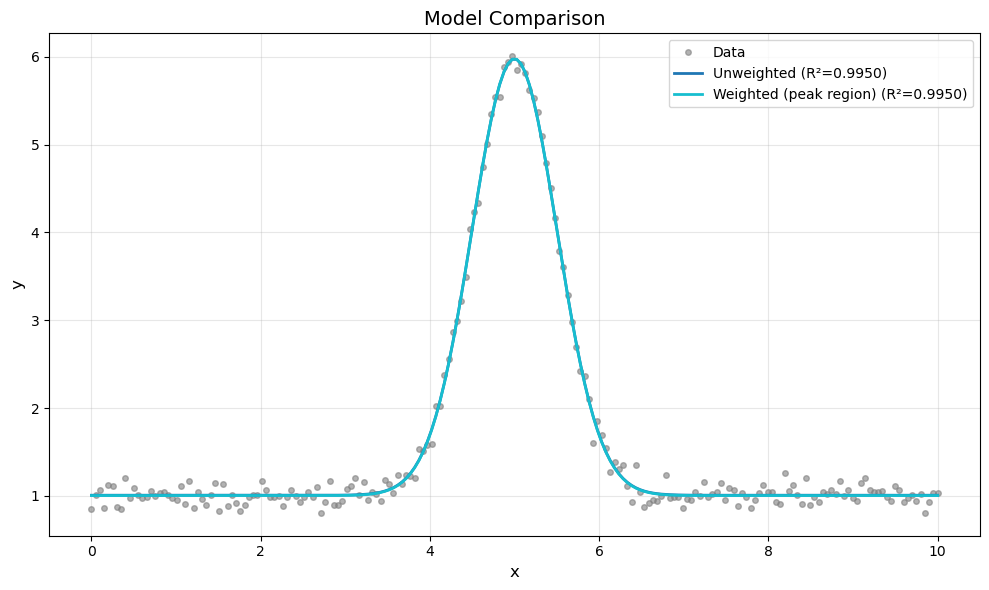

In [33]:
from pyFitting.visualization import plot_comparison
fig, ax = plot_comparison(
    [result_unweighted, result_weighted],
    labels=['Unweighted', 'Weighted (peak region)'], figsize=[10,6],save='../images/example_weighted.png')
 